In [1]:
!python ../software_install.py

     |████████████████████████████████| 194kB 28.3MB/s eta 0:00:01
     |████████████████████████████████| 61kB 7.1MB/s  eta 0:00:01
     |████████████████████████████████| 51kB 5.3MB/s  eta 0:00:01
     |████████████████████████████████| 61kB 7.6MB/s  eta 0:00:01
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libgpm2 vim-common vim-runtime xxd
Suggested packages:
  gpm ctags vim-doc vim-scripts
The following NEW packages will be installed:
  libgpm2 vim vim-common vim-runtime xxd
0 upgraded, 5 newly installed, 0 to remove and 39 not upgraded.
Need to get 6,722 kB of archives.
After this operation, 32.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 xxd amd64 2:8.0.1453-1ubuntu1.4 [49.3 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 vim-common all 2:8.0.1453-1ubuntu1.4 [70.4 kB]
Get:3 http://archive.ubu

In [1]:
!cat ../software_install.py


import os
import subprocess


# script to install necessary packages in vscode server hosted on google colab
os.system('pip install fastai -Uq')

os.system('pip install nbdev -Uq')

os.system('sudo apt-get install vim')

os.system('pip install ipywidgets -Uq')

os.system('jupyter nbextension enable --py widgetsnbextension')

os.system('git config --global user.name "fastdaima"')

os.system('git config --global user.email "sivaramakrishnang25@gmail.com"')


In [2]:
!ls

chapter5.ipynb	learnerObj  models


In [2]:
import fastai
fastai.__version__

'2.4'

In [3]:
from fastai.vision.all import *
from nbdev import *

In [ ]:
path = untar_data(URLs.PETS)

In [5]:
path = Path('/root/.fastai/data/oxford-iiit-pet')

Path.BASE_PATH = path

print (path.ls())

pets = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(seed=42),
    get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'),'name'),
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224,min_scale=0.75),
)

dls = pets.dataloaders(path/'images')

# print (pets.summary(path/'images'))

learn = cnn_learner(dls,resnet34,metrics=error_rate)

[Path('annotations'), Path('images')]


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [6]:
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.512173,0.330581,0.112991,01:03


epoch,train_loss,valid_loss,error_rate,time
0,0.495479,0.337920,0.107578,01:05
1,0.357246,0.257189,0.085927,01:05
2,0.232813,0.237032,0.078484,01:05


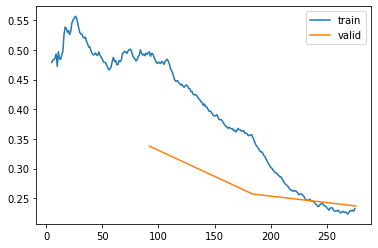

In [7]:
learn.recorder.plot_loss()

In [8]:
type(learn.recorder.values)

list

In [9]:
output = learn.recorder.values;output

[(#3) [0.4954785406589508,0.33791953325271606,0.10757780820131302],
 (#3) [0.3572461009025574,0.2571890354156494,0.08592692762613297],
 (#3) [0.23281268775463104,0.23703227937221527,0.0784844383597374]]

In [10]:
len(output)

3

In [11]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.183026,0.283746,0.087280,01:02


epoch,train_loss,valid_loss,error_rate,time
0,0.205947,0.297005,0.089986,01:05
1,0.247944,0.395741,0.111637,01:05
2,0.187947,0.317955,0.087280,01:05
3,0.119948,0.252391,0.073748,01:05
4,0.071646,0.244698,0.070365,01:05


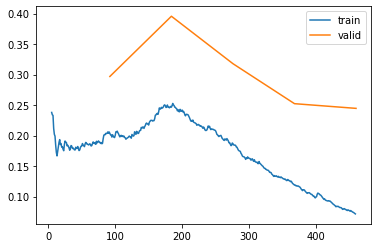

In [12]:
learn.recorder.plot_loss()

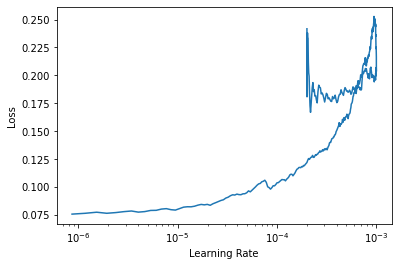

In [13]:
learn.recorder.plot_lr_find()

In [14]:
show_doc(learn.fine_tune)

<h4 id="Learner.fine_tune" class="doc_header"><code>Learner.fine_tune</code><a href="https://github.com/fastai/fastai/tree/master/fastai/callback/schedule.py#L152" class="source_link" style="float:right">[source]</a></h4>

> <code>Learner.fine_tune</code>(**`epochs`**, **`base_lr`**=*`0.002`*, **`freeze_epochs`**=*`1`*, **`lr_mult`**=*`100`*, **`pct_start`**=*`0.3`*, **`div`**=*`5.0`*, **`lr_max`**=*`None`*, **`div_final`**=*`100000.0`*, **`wd`**=*`None`*, **`moms`**=*`None`*, **`cbs`**=*`None`*, **`reset_opt`**=*`False`*)

Fine tune with `freeze` for `freeze_epochs` then with `unfreeze` from `epochs` using discriminative LR

In [15]:
learn.fine_tune??

Signature: learn.fine_tune(epochs, base_lr=0.002, freeze_epochs=1, lr_mult=100, pct_start=0.3, div=5.0, lr_max=None, div_final=100000.0, wd=None, moms=None, cbs=None, reset_opt=False)
Source:   
@patch
@delegates(Learner.fit_one_cycle)
def fine_tune(self:Learner, epochs, base_lr=2e-3, freeze_epochs=1, lr_mult=100,
              pct_start=0.3, div=5.0, **kwargs):
    "Fine tune with `freeze` for `freeze_epochs` then with `unfreeze` from `epochs` using discriminative LR"
    self.freeze()
    self.fit_one_cycle(freeze_epochs, slice(base_lr), pct_start=0.99, **kwargs)
    base_lr /= 2
    self.unfreeze()
    self.fit_one_cycle(epochs, slice(base_lr/lr_mult, base_lr), pct_start=pct_start, div=div, **kwargs)
File:      /usr/local/lib/python3.7/dist-packages/fastai/callback/schedule.py
Type:      method


In [16]:
abyssinian_img_path = path/"images"/"Abyssinian_102.jpg"

In [17]:
db1 = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_y=parent_label,
    item_tfms=Resize(460),
)

In [18]:
path.cwd()

Path('/content/drive/MyDrive/colab/fastbook_my_run/reimplementation')

In [19]:
dls1 = db1.dataloaders([abyssinian_img_path]*100,bs=8)

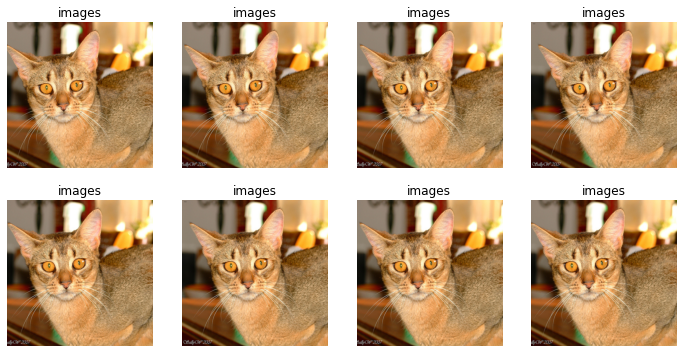

In [20]:
dls1.show_batch()

In [21]:
Inf.ones??

Type:        cycle
String form: <itertools.cycle object at 0x7f8951bf1d20>


In [22]:
db1.summary([abyssinian_img_path]*5)

Setting-up type transforms pipelines
Found 5 items
2 datasets of sizes 4,1
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Abyssinian_102.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x465
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Abyssinian_102.jpg
    applying parent_label gives
      images
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(0)

Final sample: (PILImage mode=RGB size=500x465, TensorCategory(0))


Found 5 items
2 datasets of sizes 4,1
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: 

In [23]:
 interp = ClassificationInterpretation.from_learner(learn)

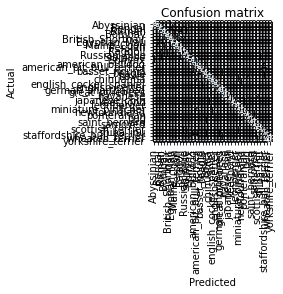

In [24]:
interp.plot_confusion_matrix()

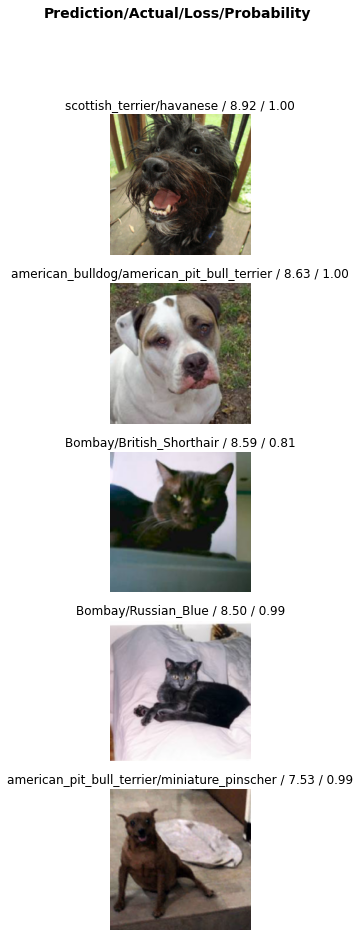

In [25]:
interp.plot_top_losses(5,nrows=5)

In [26]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [27]:
learn.loss

TensorBase([7.4311e-04, 6.2821e-05, 7.1726e-02, 4.0946e-03, 1.1921e-07, -0.0000e+00],
       device='cuda:0')

In [28]:
x,y = dls.one_batch()

In [29]:
len(x), len(y)

(64, 64)

In [30]:
dls.c


37

In [31]:
dls.vocab

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']

In [32]:
preds,targets = learn.get_preds(dl=[(x,y)])


In [33]:
targets

TensorCategory([25, 14, 29, 30, 16, 30, 13, 19, 25, 32,  7, 12,  8, 22, 24, 21, 35,  5,
         6, 17, 20,  8,  2, 12, 12, 23,  0,  5, 27, 13, 13, 29, 24,  2, 28, 33,
        25, 30, 19,  3,  0,  5, 12,  7, 17, 24, 18, 35, 36,  7, 13, 26, 28, 32,
         2, 31, 20, 31, 12, 14, 35, 29,  5, 28])

In [34]:
y

TensorCategory([25, 14, 29, 30, 16, 30, 13, 19, 25, 32,  7, 12,  8, 22, 24, 21, 35,  5,
         6, 17, 20,  8,  2, 12, 12, 23,  0,  5, 27, 13, 13, 29, 24,  2, 28, 33,
        25, 30, 19,  3,  0,  5, 12,  7, 17, 24, 18, 35, 36,  7, 13, 26, 28, 32,
         2, 31, 20, 31, 12, 14, 35, 29,  5, 28], device='cuda:0')

In [35]:
def plot_function(f, tx=None, ty=None, title=None, min=-2, max=2, figsize=(6,4)):
    x = torch.linspace(min,max)
    fig,ax = plt.subplots(figsize=figsize)
    ax.plot(x,f(x))
    if tx is not None: ax.set_xlabel(tx)
    if ty is not None: ax.set_ylabel(ty)
    if title is not None: ax.set_title(title)
        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  /pytorch/aten/src/ATen/native/RangeFactories.cpp:23.)
  


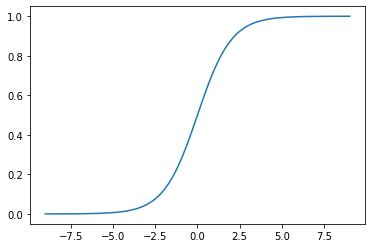

In [36]:
plot_function(torch.sigmoid,min=-9,max=9)

In [37]:
torch.random.manual_seed(42)
threeOrSeven = torch.randn((6,2));print(threeOrSeven)
act = torch.randn((6,2))*2; act

tensor([[ 0.3367,  0.1288],
        [ 0.2345,  0.2303],
        [-1.1229, -0.1863],
        [ 2.2082, -0.6380],
        [ 0.4617,  0.2674],
        [ 0.5349,  0.8094]])


tensor([[ 2.2206, -3.3796],
        [-1.9779,  1.9159],
        [ 2.6443,  1.6344],
        [-1.5317, -1.5012],
        [ 2.7051,  1.3726],
        [-0.6555,  1.5899]])

In [38]:
act.shape

torch.Size([6, 2])

In [39]:
len(act.size())

2

In [40]:
act.sigmoid_()

tensor([[0.9021, 0.0329],
        [0.1215, 0.8717],
        [0.9337, 0.8368],
        [0.1777, 0.1822],
        [0.9373, 0.7978],
        [0.3417, 0.8306]])

In [41]:
act

tensor([[0.9021, 0.0329],
        [0.1215, 0.8717],
        [0.9337, 0.8368],
        [0.1777, 0.1822],
        [0.9373, 0.7978],
        [0.3417, 0.8306]])

In [42]:
act[:,0]

tensor([0.9021, 0.1215, 0.9337, 0.1777, 0.9373, 0.3417])

In [43]:
act[:,1]

tensor([0.0329, 0.8717, 0.8368, 0.1822, 0.7978, 0.8306])

In [44]:
diff = act[:,0]-act[:,1]
diff.sigmoid_()

tensor([0.7046, 0.3208, 0.5242, 0.4989, 0.5348, 0.3802])

In [45]:
act[:,0] = diff

In [46]:
act[:,1] = 1-diff

In [47]:
act

tensor([[0.7046, 0.2954],
        [0.3208, 0.6792],
        [0.5242, 0.4758],
        [0.4989, 0.5011],
        [0.5348, 0.4652],
        [0.3802, 0.6198]])

In [48]:
act2 = torch.randn((6,2))*2; 
act3 = act2.clone().detach()
act2 


tensor([[ 0.5630,  0.1123],
        [ 1.0454, -0.4767],
        [-0.0998,  1.0527],
        [-0.0170,  1.4581],
        [ 0.2663,  1.7280],
        [-2.0313, -1.7775]])

In [49]:
act3

tensor([[ 0.5630,  0.1123],
        [ 1.0454, -0.4767],
        [-0.0998,  1.0527],
        [-0.0170,  1.4581],
        [ 0.2663,  1.7280],
        [-2.0313, -1.7775]])

In [50]:
act2.sigmoid_()

tensor([[0.6372, 0.5281],
        [0.7399, 0.3830],
        [0.4751, 0.7413],
        [0.4958, 0.8112],
        [0.5662, 0.8492],
        [0.1160, 0.1446]])

In [51]:
act3.sigmoid_()

tensor([[0.6372, 0.5281],
        [0.7399, 0.3830],
        [0.4751, 0.7413],
        [0.4958, 0.8112],
        [0.5662, 0.8492],
        [0.1160, 0.1446]])

In [52]:
diff2 = act2[:,0] - act2[:,1]
diff2.sigmoid_()

tensor([0.5272, 0.5883, 0.4338, 0.4218, 0.4297, 0.4928])

In [53]:
diff3 = act3[:,0]-act3[:,1]
diff3.sigmoid()

tensor([0.5272, 0.5883, 0.4338, 0.4218, 0.4297, 0.4928])

In [54]:
act2[:,0],act2[:,1]=diff2,1-diff2
act2

tensor([[0.5272, 0.4728],
        [0.5883, 0.4117],
        [0.4338, 0.5662],
        [0.4218, 0.5782],
        [0.4297, 0.5703],
        [0.4928, 0.5072]])

In [55]:
torch.stack([diff3.sigmoid(),1-diff3.sigmoid()],dim=1)

tensor([[0.5272, 0.4728],
        [0.5883, 0.4117],
        [0.4338, 0.5662],
        [0.4218, 0.5782],
        [0.4297, 0.5703],
        [0.4928, 0.5072]])

In [56]:
# sigmoid only used for binary problems for more than 2 classes we use sigmoid
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum(dim=1,keepdim=True)

In [57]:
softmax(torch.tensor([[2,3]]))

tensor([[0.2689, 0.7311]])

In [58]:
torch.exp(torch.tensor(2))

tensor(7.3891)

In [59]:
softmax_acts = torch.softmax(act3,dim=1)
softmax_acts

tensor([[0.5272, 0.4728],
        [0.5883, 0.4117],
        [0.4338, 0.5662],
        [0.4218, 0.5782],
        [0.4297, 0.5703],
        [0.4928, 0.5072]])

In [60]:
# the value we calculated using sigmoid and the value calculated using softmax is same
# how awesome it is 
# the main advantage of softmax we can able to use in more than two classes also

In [61]:
learn.recorder.values

[(#2) [0.019497932866215706,0.0]]

In [62]:
!nvidia-smi

Wed Jun 16 04:40:02 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    34W /  70W |   4368MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [63]:
preds,_ = learn.get_preds(dl=[(x,y)])

In [67]:
softmax??

Signature: softmax(x)
Source:   
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum(dim=1,keepdim=True)
File:      /content/drive/My Drive/colab/fastbook_my_run/reimplementation/<ipython-input-56-31322a84d174>
Type:      function


In [68]:
bears = torch.tensor([[0.02,-2.49,1.25]])

In [71]:
exp = torch.exp(bears)

In [84]:
sum_ = exp[0].sum()

In [88]:
calculated_softmax = exp/sum_; calculated_softmax

tensor([[0.2221, 0.0180, 0.7599]])

In [89]:
softmax(bears)

tensor([[0.2221, 0.0180, 0.7599]])

In [94]:
assert softmax(bears)[0].sum()== calculated_softmax[0].sum(), "adding probs almost always should add to 1"

In [95]:
act

tensor([[0.7046, 0.2954],
        [0.3208, 0.6792],
        [0.5242, 0.4758],
        [0.4989, 0.5011],
        [0.5348, 0.4652],
        [0.3802, 0.6198]])

In [96]:
target = torch.tensor([0,1,0,1,1,0])

In [97]:
idx = range(6);idx

range(0, 6)

In [98]:
act[idx,target]

tensor([0.7046, 0.6792, 0.5242, 0.5011, 0.4652, 0.3802])

In [101]:
from IPython.display import HTML

df = pd.DataFrame(act,columns=["3","7"])

df['target']=target
df['index']=idx
df['loss']=act[idx,target]
t = df.style.hide_index()
html = t._repr_html_().split('</style>')[1]
html = re.sub('r<table id="([^"]+"])"\s*>',r'<table >',html)
display(HTML(html))

3,7,target,index,loss
0.704567,0.295433,0,0,0.704567
0.320790,0.679210,1,1,0.679210
0.524203,0.475797,0,2,0.524203
0.498877,0.501123,1,3,0.501123
0.534823,0.465177,1,4,0.465177
0.380162,0.619838,0,5,0.380162


In [112]:
-act[idx,target],-act[idx,target].sum()

(tensor([-0.7046, -0.6792, -0.5242, -0.5011, -0.4652, -0.3802]),
 tensor(-3.2544))

In [120]:
show_doc(F.nll_loss)

<h4 id="nll_loss" class="doc_header"><code>nll_loss</code><a href="torch/nn/functional.py#L2315" class="source_link" style="float:right">[source]</a></h4>

> <code>nll_loss</code>(**`input`**:`Tensor`, **`target`**:`Tensor`, **`weight`**:`Optional`\[`Tensor`\]=*`None`*, **`size_average`**:`Optional`\[`bool`\]=*`None`*, **`ignore_index`**:`int`=*`-100`*, **`reduce`**:`Optional`\[`bool`\]=*`None`*, **`reduction`**:`str`=*`'mean'`*)

The negative log likelihood loss.

See :class:`~torch.nn.NLLLoss` for details.

Args:
    input: :math:`(N, C)` where `C = number of classes` or :math:`(N, C, H, W)`
        in case of 2D Loss, or :math:`(N, C, d_1, d_2, ..., d_K)` where :math:`K \geq 1`
        in the case of K-dimensional loss.
    target: :math:`(N)` where each value is :math:`0 \leq \text{targets}[i] \leq C-1`,
        or :math:`(N, d_1, d_2, ..., d_K)` where :math:`K \geq 1` for
        K-dimensional loss.
    weight (Tensor, optional): a manual rescaling weight given to each
        class. If given, has to be a Tensor of size `C`
    size_average (bool, optional): Deprecated (see :attr:`reduction`). By default,
        the losses are averaged over each loss element in the batch. Note that for
        some losses, there multiple elements per sample. If the field :attr:`size_average`
        is set to ``False``, the losses are instead summed for each minibatch. Ignored
        when reduce is ``False``. Default: ``True``
    ignore_index (int, optional): Specifies a target value that is ignored
        and does not contribute to the input gradient. When :attr:`size_average` is
        ``True``, the loss is averaged over non-ignored targets. Default: -100
    reduce (bool, optional): Deprecated (see :attr:`reduction`). By default, the
        losses are averaged or summed over observations for each minibatch depending
        on :attr:`size_average`. When :attr:`reduce` is ``False``, returns a loss per
        batch element instead and ignores :attr:`size_average`. Default: ``True``
    reduction (string, optional): Specifies the reduction to apply to the output:
        ``'none'`` | ``'mean'`` | ``'sum'``. ``'none'``: no reduction will be applied,
        ``'mean'``: the sum of the output will be divided by the number of
        elements in the output, ``'sum'``: the output will be summed. Note: :attr:`size_average`
        and :attr:`reduce` are in the process of being deprecated, and in the meantime,
        specifying either of those two args will override :attr:`reduction`. Default: ``'mean'``

Example::

    >>> # input is of size N x C = 3 x 5
    >>> input = torch.randn(3, 5, requires_grad=True)
    >>> # each element in target has to have 0 <= value < C
    >>> target = torch.tensor([1, 0, 4])
    >>> output = F.nll_loss(F.log_softmax(input), target)
    >>> output.backward()

In [103]:
F.nll_loss(act,target,reduction='none')

tensor([-0.7046, -0.6792, -0.5242, -0.5011, -0.4652, -0.3802])

In [110]:
F.nll_loss(act,target,reduction='sum')

tensor(-3.2544)

In [113]:
F.nll_loss(act,target,reduction='mean')

tensor(-0.5424)

crossentropy_loss = log_softmax + nll (negative log likelihood) ? why nll doesn't take log because
taking log at softmax stage is less computation intensive.

In [117]:
loss = nn.CrossEntropyLoss(reduction='none');type(loss)

torch.nn.modules.loss.CrossEntropyLoss

In [118]:
loss(act,target)

tensor([0.5094, 0.5299, 0.6692, 0.6920, 0.7286, 0.8201])

In [122]:
F.cross_entropy(act,target)

tensor(0.6582)

In [125]:
F.cross_entropy(act,target,reduction='none')

tensor([0.5094, 0.5299, 0.6692, 0.6920, 0.7286, 0.8201])

In [128]:
torch.log(torch.tensor(-2))

tensor(nan)

In [131]:
math.log(2)

0.6931471805599453

In [132]:
interp = ClassificationInterpretation.from_learner(learn)

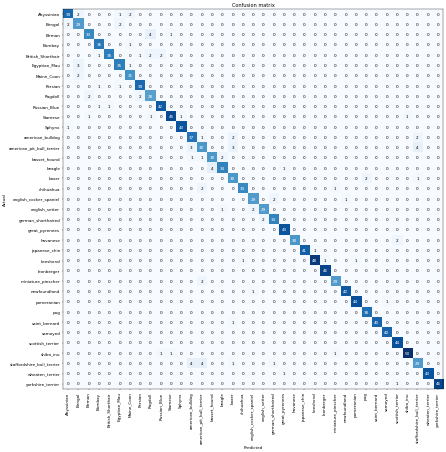

In [166]:
interp.plot_confusion_matrix(figsize=(15,15),dpi=30)

In [140]:
interp.most_confused(min_val=4)

[('Birman', 'Ragdoll', 4),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 4),
 ('beagle', 'basset_hound', 4),
 ('staffordshire_bull_terrier', 'american_bulldog', 4),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4)]

In [142]:
learn.fine_tune(1,base_lr=0.01)

epoch,train_loss,valid_loss,error_rate,time
0,0.262574,0.482508,0.100812,01:03


epoch,train_loss,valid_loss,error_rate,time
0,0.946508,0.558008,0.138024,01:07


In [149]:
learn2 = cnn_learner(dls,resnet34,metrics=error_rate)

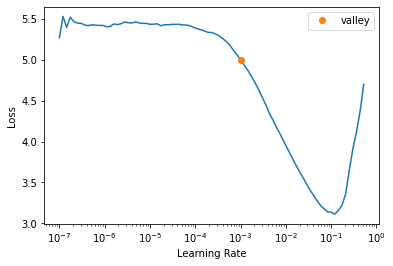

In [152]:
k = learn2.lr_find()

In [157]:
learn.lr_find??


Signature: learn.lr_find(start_lr=1e-07, end_lr=10, num_it=100, stop_div=True, show_plot=True, suggest_funcs=<function valley at 0x7f89537a6e60>)
Source:   
@patch
def lr_find(self:Learner, start_lr=1e-7, end_lr=10, num_it=100, stop_div=True, show_plot=True, suggest_funcs=(SuggestionMethod.Valley)):
    "Launch a mock training to find a good learning rate and return suggestions based on `suggest_funcs` as a named tuple"
    n_epoch = num_it//len(self.dls.train) + 1
    cb=LRFinder(start_lr=start_lr, end_lr=end_lr, num_it=num_it, stop_div=stop_div)
    with self.no_logging(): self.fit(n_epoch, cbs=cb)
    if suggest_funcs is not None:
        lrs, losses = tensor(self.recorder.lrs[num_it//10:-5]), tensor(self.recorder.losses[num_it//10:-5])
        _suggestions, nms = [], []
        for func in tuplify(suggest_funcs):
            nms.append(func.__name__ if not isinstance(func, partial) else func.func.__name__) # deal with partials
            _suggestions.append(func(lrs, losses, num_i

In [161]:
k

SuggestedLRs(valley=tensor(0.0010))

In [162]:
learn.unfreeze()

SuggestedLRs(valley=tensor(5.2481e-05))

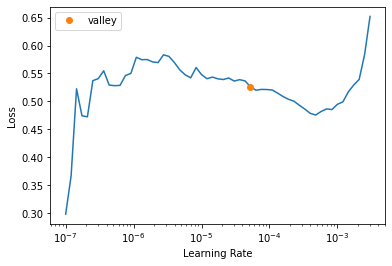

In [163]:
learn.lr_find()

In [165]:
# learn.fit_one_cycle(6,lr_max=5.2481e-05)

learn.fit_one_cycle(6,lr_max=5.2481e-05) <br>

epoch	train_loss	valid_loss	error_rate	time <br>
0	0.456320	0.394022	0.096752	01:08 <br>
1	0.334231	0.342961	0.083221	01:07 <br>
2	0.251026	0.302254	0.069689	01:06 <br>
3	0.176533	0.300656	0.066982	01:07 <br>
4	0.144435	0.300931	0.066982	01:06 <br>
5	0.121527	0.285549	0.066982	01:06

In [167]:
learn3 = cnn_learner(dls,resnet34,metrics=error_rate)
learn3.fit_one_cycle(3,3e-3)
learn3.unfreeze()
learn3.fit_one_cycle(12,lr_max=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.154597,0.404362,0.125169,01:04
1,0.506685,0.252670,0.075778,01:04
2,0.330915,0.225096,0.075101,01:05


epoch,train_loss,valid_loss,error_rate,time
0,0.251102,0.222393,0.069689,01:07
1,0.258256,0.217944,0.072395,01:08
2,0.236415,0.213109,0.069012,01:08
3,0.214968,0.219832,0.070365,01:08
4,0.195014,0.207781,0.068336,01:08
5,0.174328,0.195680,0.060217,01:08
6,0.158277,0.194952,0.065629,01:08
7,0.157311,0.193940,0.060217,01:08
8,0.143077,0.195600,0.063599,01:08
9,0.123359,0.194318,0.059540,01:08


In [170]:
learn3.recorder.plot_loss()

In [171]:
from fastai.callback.fp16 import *
learn4 = cnn_learner(dls,resnet50,metrics=error_rate).to_fp16()


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [172]:
learn4.fine_tune(6,freeze_epochs=3)

epoch,train_loss,valid_loss,error_rate,time
0,1.273677,0.272022,0.089986,01:07
1,0.570695,0.263235,0.084574,01:04
2,0.428453,0.235716,0.084574,01:04


epoch,train_loss,valid_loss,error_rate,time
0,0.286108,0.222758,0.075778,01:06
1,0.310678,0.320282,0.100812,01:06
2,0.259232,0.275380,0.083221,01:06
3,0.160358,0.233478,0.062923,01:06
4,0.089601,0.173244,0.053451,01:06
5,0.071147,0.166041,0.050744,01:06


# [TODO]revisiting lesson 2 nb 
* data cleaner
* different item tfms

In [64]:

# further findings
# what is @patch
# what is @delegates